<a href="https://colab.research.google.com/github/KimporNeav/Machine-Learning/blob/main/ML_Midterm_Sem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn #machine learing
import numpy as np #computation
import pandas as pd #data management
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#dataset
from google.colab import files
upload = files.upload()

Saving MMM.csv to MMM (2).csv


In [ ]:
dataset = pd.read_csv('MMM.csv')
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,175.000000,176.199997,170.550003,171.869995,163.336868,2996200
1,2021-01-05,172.009995,173.250000,170.649994,171.580002,163.061279,2295300
2,2021-01-06,172.720001,175.570007,172.039993,174.190002,165.541672,3346400
3,2021-01-07,171.559998,173.460007,166.160004,169.720001,161.293625,5863400
4,2021-01-08,169.169998,169.539993,164.610001,166.619995,158.347534,4808100


In [ ]:
#c. Clean the dataset
dataset.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
225,False,False,False,False,False,False,False
226,False,False,False,False,False,False,False
227,False,False,False,False,False,False,False
228,False,False,False,False,False,False,False


In [ ]:
#d. Fill the missing values of the dataset using the average of column "Low" from the dataset
# Since there's no missing value, we no need to fill in the missing values 

In [ ]:
#e. Find the missing percent of each column
dataset.isnull().sum()/len(dataset)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

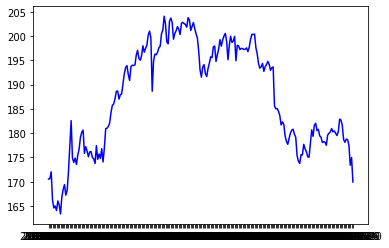

In [ ]:
#f. Draw 3 different graphs for Date vs Low, Date vs High, Date vs Close

#graphs for Date vs Low
date = dataset['Date']
low = dataset['Low']
plt.plot(date, low, color = "Blue")

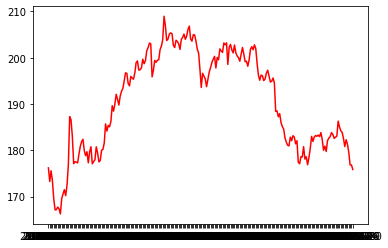

In [ ]:
#graphs for Date vs High
high = dataset['High']
plt.plot(date, high, color = "Red")

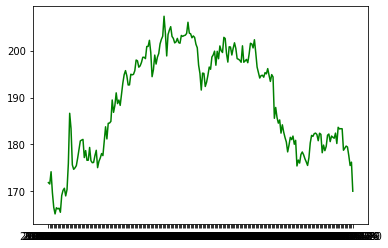

In [ ]:
#graphs for Date vs Close
close = dataset['Close']
plt.plot(date, close, color = "Green")

In [ ]:
#g. Build a multiple linear regression model to predict the closing price using the volume, low and high price of the dataset
x_var = ["Volume", "Low", "High"] #input we use Volume, Low and High
y_var = ["Close"] #output we use Close

len(x_var)
#reshape variable
x = dataset[x_var].values.reshape(-1,3) 
y = dataset[y_var].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(230, 3)
(230, 1)


In [ ]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #80% for the train, 20% for the testing
print(x_train.shape)
print(x_test.shape)

(184, 3)
(46, 3)


In [ ]:
#build a model(multiplelinear)
Lin_reg = LinearRegression()

In [ ]:
#training
model = Lin_reg.fit(x_train, y_train)

In [ ]:
#finding intercept & slope(Coefficient)
Q_0 = model.intercept_
print(Q_0)
Q_1 = model.coef_
print(Q_1)

[-0.11214591]
[[1.09820137e-08 5.58080889e-01 4.43422723e-01]]


In [ ]:
#result prediction
y_predict = model.predict(x_test)
print(y_predict)

[[175.43437443]
 [195.17657949]
 [202.87302981]
 [195.36678904]
 [183.79311804]
 [200.76982293]
 [196.30779571]
 [201.57850008]
 [202.61688991]
 [166.34258197]
 [203.2866544 ]
 [181.42360925]
 [197.62482217]
 [176.94350094]
 [199.00771001]
 [196.26929898]
 [180.15344736]
 [166.95995756]
 [192.40143132]
 [177.99541214]
 [178.58025687]
 [181.31905865]
 [202.63489781]
 [171.97254837]
 [187.65155387]
 [198.30992838]
 [194.70306203]
 [177.54610295]
 [197.60848468]
 [201.27558768]
 [164.82956621]
 [198.80696775]
 [198.517184  ]
 [201.03628587]
 [196.95098271]
 [170.49326229]
 [183.7527781 ]
 [176.670405  ]
 [195.44960101]
 [194.44647256]
 [201.39094543]
 [166.11492777]
 [176.08528427]
 [205.0723457 ]
 [200.23381538]
 [182.03430257]]


In [ ]:
#h. Predict the exact closing price of anyone of the given input. Decide the input values by yourself as relevant to the dataset. Should analyze the dataset before choosing the input.
#Analyze the choosing values

print(x_test[0], y_test[0])

[3.01010000e+06 1.73779999e+02 1.77100006e+02] [176.039993]


In [ ]:
#Choosing value for Volume
# Volume = 3.01010000e+06

In [ ]:
#Choosing value for High
# High = 1.73779999e+02

In [ ]:
#Choosing value for Low
# Low = 1.77100006e+02

In [ ]:
#predict the single value
x_assum = np.array([3.01010000e+06, 1.73779999e+02, 1.77100006e+02]) 
x_assum = x_assum.reshape(-1,3)

y_pred = model.predict(x_assum)
print(y_pred)

[[175.43437443]]


In [ ]:
#i. Use any one of the evaluation models to justify your predicted result
# Find Mean square error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error : ", mean_squared_error(y_test, y_predict))

Mean Squared Error :  0.6957292556178937


In [ ]:
#j. Write your reflection on this task as a conclusion

My reflection on this task as a conclusion:
- Predicting the future data: I understand how to predict the future result of a information base on the past dataset. It helps me to prevent and decrease the risk for me in the future. Because if we are able to predict the right stock price, we could earn a significant profit from it.
- Choosing the dataset: I have learnt to be careful on selecting the range or the duration of the past dataset to predict the future. It would be better to understand the past dataset but if the dataset is way too old, it might not help to avoid the risk and give the good prediction answer. So I would need to be careful choosing the nearest past dataset. For instance, if I want to predict a data in 2022, I might better to choose the past dataset from 2021 instead of choosing 2010, or 2015. 